In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
salary = pd.read_csv("SalaryData.csv")

In [3]:
salary.head(10)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [4]:
salary.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40,NaN,NaN,NaN,162187,64860.4,50103,99897.5,169100,214441,260151


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
salary.isna().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [7]:
dup_sal = salary.duplicated().sum()
print("No. of duplicated rows =", dup_sal)

No. of duplicated rows = 0


In [8]:
salary.shape

(40, 3)

H0: The mean Salary is same for all every type of education

H1: The mean salary is not same for all types of education

H0: The mean salary is same for people having different occupations

H1: The mean salary is not same for all people having different occupations

In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm 

In [10]:
formula = 'Salary ~ C(Education)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [11]:
formula = 'Salary ~ C(Occupation) + Salary'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,2.914918e+29,0.0
Salary,1.0,1.528092e+11,1.528092e+11,1.186877e+31,0.0
Residual,35.0,4.506215e-19,1.287490e-20,NaN,NaN


In [12]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


In [13]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,2.284576,9.648715e-02
C(Education),2.0,9.695663e+10,4.847831e+10,29.510933,3.708479e-08
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


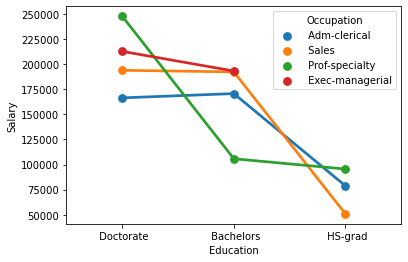

In [14]:
sns.pointplot(x='Education', y='Salary', data=salary, hue='Occupation',ci=None);

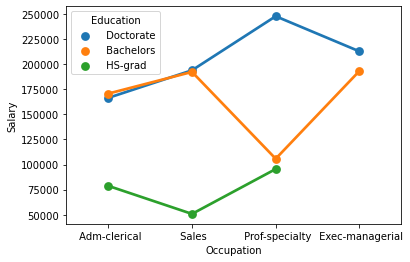

In [15]:
sns.pointplot(x='Occupation', y='Salary', data=salary, hue='Education', ci=None);

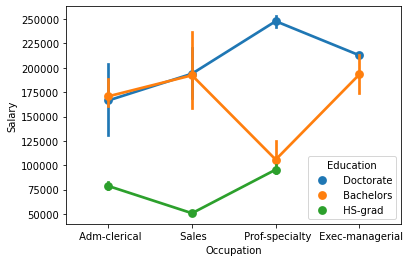

In [16]:
sns.pointplot(x='Occupation', y='Salary', data=salary, hue='Education');

In [17]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Education):C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,5.277862,4.993238e-03
C(Education),2.0,9.695663e+10,4.847831e+10,68.176603,1.090908e-11
C(Education):C(Occupation),6.0,3.563950e+10,5.939916e+09,8.353494,2.643089e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [18]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [19]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [20]:
edu = pd.read_csv("Education12th.csv")

In [21]:
edu.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [22]:
edu.shape

(777, 18)

In [23]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [24]:
edu.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [25]:
dups_edu = edu.duplicated().sum()
print("No. of duplicate rows are:",dups_edu)
dups_edu

No. of duplicate rows are: 0


0

In [26]:
edu.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


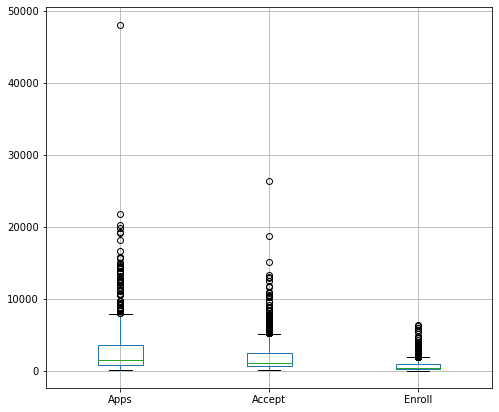

In [27]:
edu.boxplot(column=['Apps','Accept','Enroll'],figsize=(8,7))

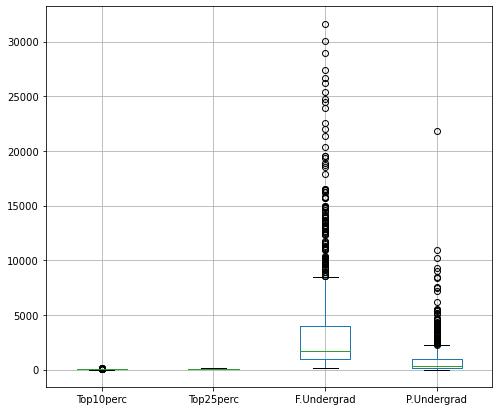

In [28]:
edu.boxplot(column=['Top10perc','Top25perc','F.Undergrad','P.Undergrad'],figsize=(8,7))

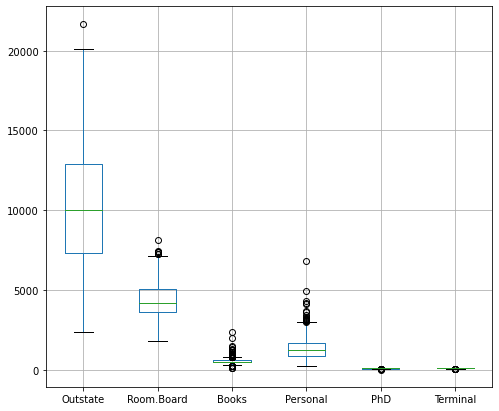

In [29]:
edu.boxplot(column=['Outstate','Room.Board','Books','Personal','PhD','Terminal'],figsize=(8,7))

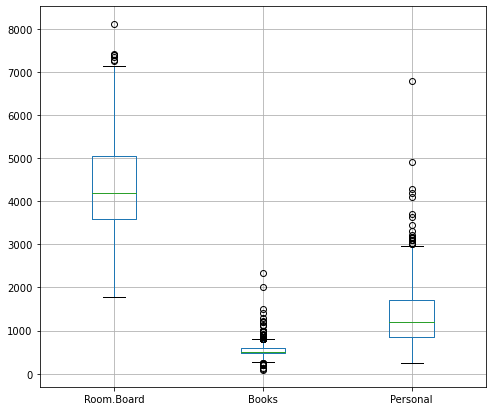

In [30]:
edu.boxplot(column=['Room.Board','Books','Personal'],figsize=(8,7))

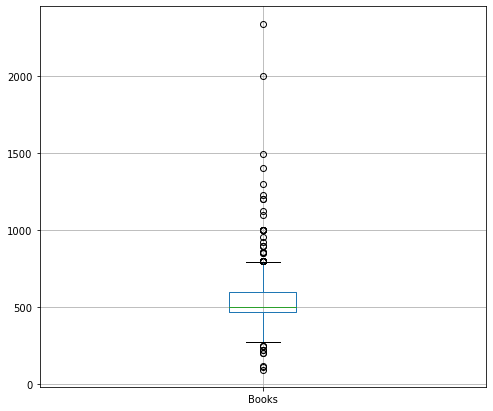

In [31]:
edu.boxplot(column='Books',figsize=(8,7))

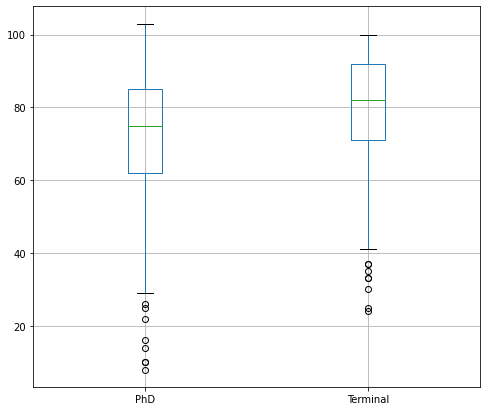

In [32]:
edu.boxplot(column=['PhD','Terminal'],figsize=(8,7))

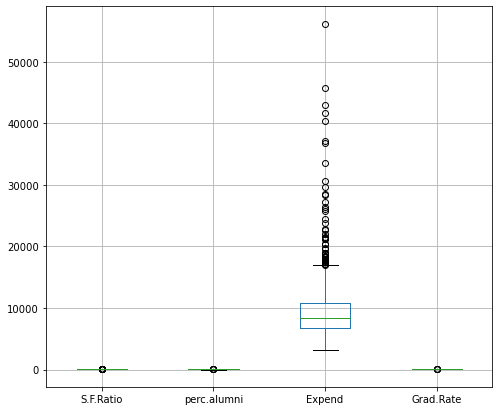

In [33]:
edu.boxplot(column=['S.F.Ratio','perc.alumni','Expend','Grad.Rate'],figsize=(8,7))

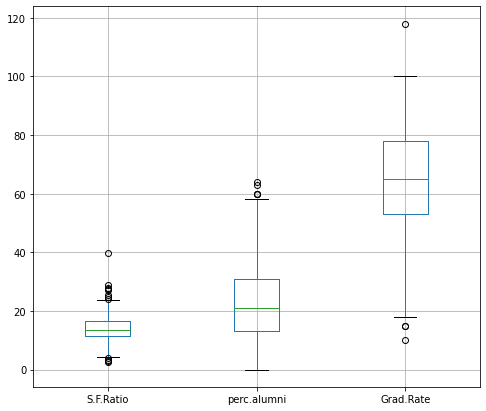

In [34]:
edu.boxplot(column=['S.F.Ratio','perc.alumni','Grad.Rate'],figsize=(8,7))

## Removal of the outliers

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

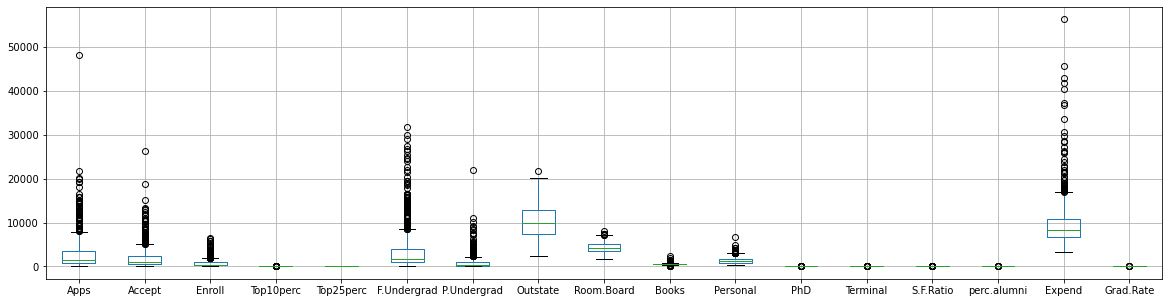

In [36]:
edu.boxplot(figsize=(20,5))

In [37]:
lrapps,urapps=remove_outlier(edu['Apps'])
edu.Apps=np.where(edu['Apps']>urapps,urapps,edu['Apps'])
edu['Apps']=np.where(edu['Apps']<lrapps,lrapps,edu['Apps'])

lracc,uracc=remove_outlier(edu['Accept'])
edu.Accept=np.where(edu['Accept']>uracc,uracc,edu['Accept'])
edu['Accept']=np.where(edu['Accept']<lracc,lracc,edu['Accept'])

lrenroll,urenroll=remove_outlier(edu['Enroll'])
edu.Enroll=np.where(edu['Enroll']>urenroll,urenroll,edu['Enroll'])
edu['Enroll']=np.where(edu['Enroll']<lrenroll,lrenroll,edu['Enroll'])

lrtop10,urtop10=remove_outlier(edu['Top10perc'])
edu.Top10perc=np.where(edu['Top10perc']>urtop10,urtop10,edu['Top10perc'])
edu['Top10perc']=np.where(edu['Top10perc']<lrtop10,lrtop10,edu['Top10perc'])

lrtop25,urtop25=remove_outlier(edu['Top25perc'])
edu.Top25perc=np.where(edu['Top25perc']>urtop25,urtop25,edu['Top25perc'])
edu['Top25perc']=np.where(edu['Top25perc']<lrtop25,lrtop25,edu['Top25perc'])

lrfun,urfun=remove_outlier(edu['F.Undergrad'])
edu['F.Undergrad']=np.where(edu['F.Undergrad']>urfun,urfun,edu['F.Undergrad'])
edu['F.Undergrad']=np.where(edu['F.Undergrad']<lrfun,lrfun,edu['F.Undergrad'])

lrpun,urpun=remove_outlier(edu['P.Undergrad'])
edu['P.Undergrad']=np.where(edu['P.Undergrad']>urpun,urpun,edu['P.Undergrad'])
edu['P.Undergrad']=np.where(edu['P.Undergrad']<lrpun,lrpun,edu['P.Undergrad'])

lrroom,urroom=remove_outlier(edu['Room.Board'])
edu['Room.Board']=np.where(edu['Room.Board']>urroom,urroom,edu['Room.Board'])
edu['Room.Board']=np.where(edu['Room.Board']<lrroom,lrroom,edu['Room.Board'])

lrbook,urbook=remove_outlier(edu['Books'])
edu.Books=np.where(edu['Books']>urbook,urbook,edu['Books'])
edu['Books']=np.where(edu['Books']<lrbook,lrbook,edu['Books'])

lrper,urper=remove_outlier(edu['Personal'])
edu.Personal=np.where(edu['Personal']>urper,urper,edu['Personal'])
edu['Personal']=np.where(edu['Personal']<lrper,lrper,edu['Personal'])

lrphd,urphd=remove_outlier(edu['PhD'])
edu.PhD=np.where(edu['PhD']>urphd,urphd,edu['PhD'])
edu['PhD']=np.where(edu['PhD']<lrphd,lrphd,edu['PhD'])

lrterm,urterm=remove_outlier(edu['Terminal'])
edu.Terminal=np.where(edu['Terminal']>urterm,urterm,edu['Terminal'])
edu['Terminal']=np.where(edu['Terminal']<lrterm,lrterm,edu['Terminal'])

lrsfr,ursfr=remove_outlier(edu['S.F.Ratio'])
edu['S.F.Ratio']=np.where(edu['S.F.Ratio']>ursfr,ursfr,edu['S.F.Ratio'])
edu['S.F.Ratio']=np.where(edu['S.F.Ratio']<lrsfr,lrsfr,edu['S.F.Ratio'])

lrpercal,urpercal=remove_outlier(edu['perc.alumni'])
edu['perc.alumni']=np.where(edu['perc.alumni']>urpercal,urpercal,edu['perc.alumni'])
edu['perc.alumni']=np.where(edu['perc.alumni']<lrpercal,lrpercal,edu['perc.alumni'])

lrexpend,urexpend=remove_outlier(edu['Expend'])
edu.Expend=np.where(edu['Expend']>urexpend,urexpend,edu['Expend'])
edu['Expend']=np.where(edu['Expend']<lrexpend,lrexpend,edu['Expend'])

lrgradrate,urgradrate=remove_outlier(edu['Grad.Rate'])
edu['Grad.Rate']=np.where(edu['Grad.Rate']>urgradrate,urgradrate,edu['Grad.Rate'])
edu['Grad.Rate']=np.where(edu['Grad.Rate']<lrgradrate,lrgradrate,edu['Grad.Rate'])

edu.shape

(777, 18)

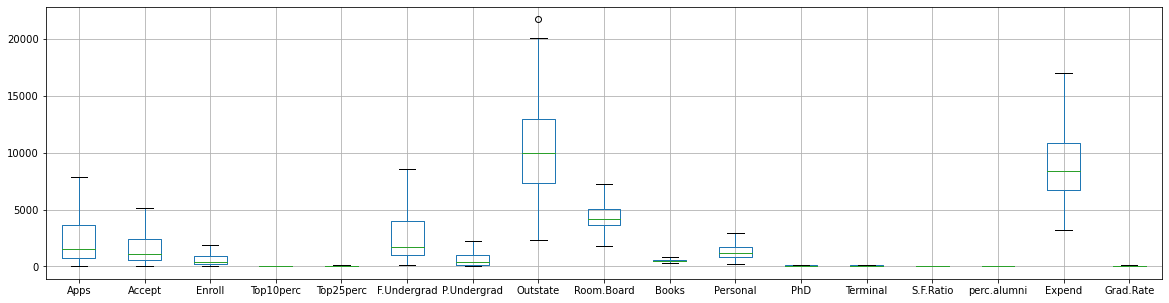

In [38]:
edu.boxplot(figsize=(20,5))

## Univariate Analysis

In [39]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("******************")
    print(edu[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print('******************')
    sns.distplot(edu[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('******************')
    ax = sns.boxplot(x=edu[column],color='orange')
    plt.show()

Description of Apps
******************
count     777.000000
mean     2571.352638
std      2422.195279
min        81.000000
25%       776.000000
50%      1558.000000
75%      3624.000000
max      7896.000000
Name: Apps, dtype: float64 Distribution of Apps
******************


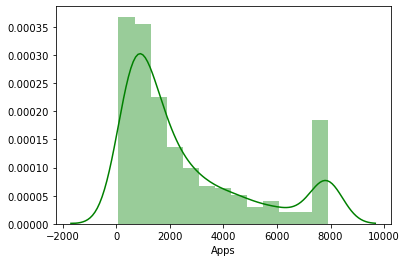

Boxplot of Apps
******************


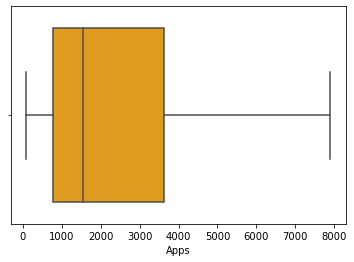

In [40]:
#for whole dataset, the commented part will be used

''''edu_num = edu.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(edu_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,16)'''

univariateAnalysis_numeric('Apps',10)


## Bivariate Analysis

In [41]:
edu.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065216,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005110,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155718,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.561963,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489394,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226200,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354209,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065216,-0.005110,-0.155718,0.561963,0.489394,-0.226200,-0.354209,1.000000,0.655249,0.005170,-0.325663,0.390915,0.412276,-0.573620,0.565651,0.775325,0.572201
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655249,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005170,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


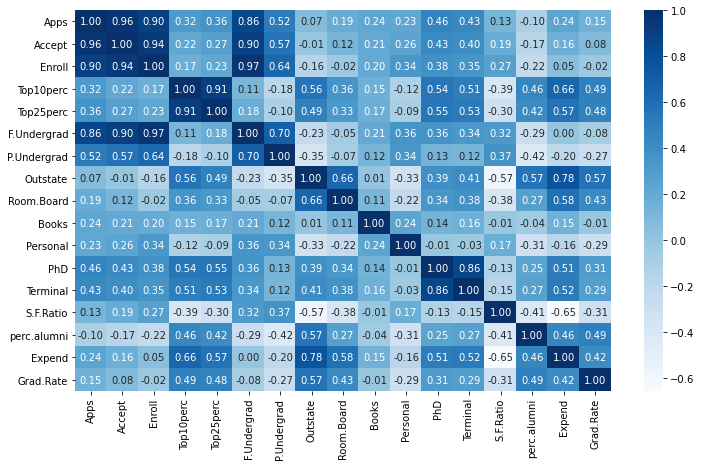

In [42]:
plt.figure(figsize=(12,7))
sns.heatmap(edu.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

# Scaling

In [43]:
edu_new = edu.drop(['Names'], axis =1)

edu_new.head()

from scipy.stats import zscore
edu_new=edu_new.apply(zscore)
edu_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746356,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457496,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201305,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626633,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716508,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


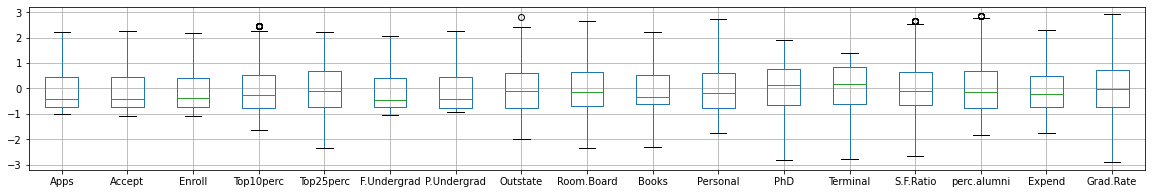

In [44]:
edu_new.boxplot(figsize=(20,3))

# PCA

In [45]:
cov_matrix = np.cov(edu_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.52998927e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.11694701e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55918498e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62687647e-

In [46]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.62229954e-01  3.14086037e-01  8.09955831e-02 -9.88928777e-02
  -2.19853756e-01  2.20227040e-03 -2.83402150e-02 -8.99539206e-02
   1.30529963e-01 -1.56399024e-01 -8.64339039e-02  1.82176767e-01
  -5.99192409e-01  8.95731261e-02  8.93620797e-02  5.49345180e-01
   5.60461479e-03]
 [-2.30624175e-01  3.44579410e-01  1.07628639e-01 -1.18256183e-01
  -1.89591977e-01 -1.65097581e-02 -1.29185319e-02 -1.37615449e-01
   1.42229385e-01 -1.49176136e-01 -4.27692108e-02 -3.91053967e-01
   6.61475193e-01  1.58543942e-01  4.45021452e-02  2.91678683e-01
   1.44515496e-02]
 [-1.89344833e-01  3.82775616e-01  8.55219277e-02 -9.42087583e-03
  -1.62328025e-01 -6.80760682e-02 -1.52041732e-02 -1.44235243e-01
   5.08457135e-02 -6.48716395e-02 -4.38253321e-02  7.16683738e-01
   2.33289412e-01 -3.50755203e-02 -6.22274427e-02 -4.16942023e-01
  -4.99188776e-02]
 [-3.38870612e-01 -9.93810159e-02 -7.87314184e-02  3.69061925e-01
  -1.57346400e-01 -8.88704326e-02 -2.57598708e-01  2.89415886e-01
 

In [47]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26418711  62.01955902  68.63670192  74.53510631  79.65908311
  84.15772951  87.59378071  90.79260926  93.28072429  95.51935846
  96.97198249  97.83713159  98.62631364  99.20701804  99.64580501
  99.86844197 100.        ]


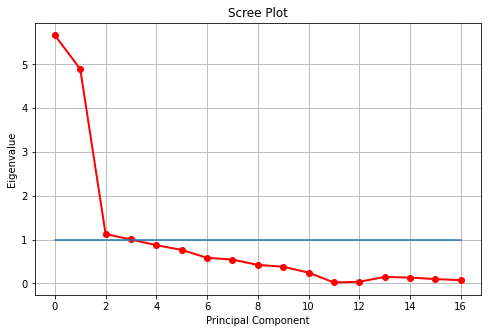

In [48]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(edu_new.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,17),np.ones(17))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8,random_state=123) #as per the scree plot, n_components=3
edu_pca = pca.fit_transform(edu_new)
edu_pca.transpose()

array([[-1.60229153e+00, -1.80481136e+00, -1.60860416e+00, ...,
        -5.76742904e-01,  6.57047876e+00, -4.77040251e-01],
       [ 9.93964675e-01, -7.00902925e-02, -1.38246959e+00, ...,
         1.78521151e-02, -1.18592910e+00,  1.04399274e+00],
       [ 2.98657591e-02,  2.12293310e+00, -5.01472013e-01, ...,
         3.21930830e-01,  1.32596986e+00, -1.42582173e+00],
       ...,
       [-6.97542140e-01,  9.95111125e-01, -1.02622772e+00, ...,
         5.04043155e-01, -8.22646525e-01,  1.05184281e+00],
       [ 7.10075776e-01, -3.96160581e-01, -1.65355313e-01, ...,
        -1.45817474e+00,  1.20129293e+00,  1.07317781e+00],
       [ 8.95231953e-01,  2.59633499e-01, -4.09051832e-01, ...,
        -2.89623190e-01,  6.26949715e-03,  6.06188266e-01]])

In [50]:
pca.components_

array([[ 2.62229954e-01,  2.30624175e-01,  1.89344833e-01,
         3.38870612e-01,  3.34693925e-01,  1.63363953e-01,
         2.25370199e-02,  2.83418894e-01,  2.44165100e-01,
         9.67336197e-02, -3.51980721e-02,  3.26417621e-01,
         3.23125866e-01, -1.63117512e-01,  1.86577501e-01,
         3.28948915e-01,  2.38796220e-01],
       [ 3.14086037e-01,  3.44579410e-01,  3.82775616e-01,
        -9.93810159e-02, -5.95673511e-02,  3.98602853e-01,
         3.57544493e-01, -2.51926173e-01, -1.31948412e-01,
         9.39488008e-02,  2.32449626e-01,  5.50923798e-02,
         4.29817641e-02,  2.59836893e-01, -2.57127529e-01,
        -1.60079675e-01, -1.67560132e-01],
       [-8.09955831e-02, -1.07628639e-01, -8.55219277e-02,
         7.87314184e-02,  5.06859756e-02, -7.36990732e-02,
        -4.02991311e-02, -1.47793128e-02,  2.12471630e-02,
         6.97109228e-01,  5.30972095e-01, -8.11568293e-02,
        -5.90116499e-02, -2.74182670e-01, -1.03778841e-01,
         1.84231441e-01, -2.4

In [51]:
edu_pca_loading = pd.DataFrame(pca.components_,columns=list(edu_new))
edu_pca_loading.shape

(8, 17)

In [52]:
edu_pca_loading.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262230,0.230624,0.189345,0.338871,0.334694,0.163364,0.022537,0.283419,0.244165,0.096734,-0.035198,0.326418,0.323126,-0.163118,0.186578,0.328949,0.238796
1,0.314086,0.344579,0.382776,-0.099381,-0.059567,0.398603,0.357544,-0.251926,-0.131948,0.093949,0.232450,0.055092,0.042982,0.259837,-0.257128,-0.160080,-0.167560
2,-0.080996,-0.107629,-0.085522,0.078731,0.050686,-0.073699,-0.040299,-0.014779,0.021247,0.697109,0.530972,-0.081157,-0.059012,-0.274183,-0.103779,0.184231,-0.245356
3,0.098893,0.118256,0.009421,-0.369062,-0.416766,0.014042,0.225334,0.263127,0.580772,-0.036305,-0.115165,-0.147493,-0.089232,-0.259459,-0.223892,0.213763,-0.036091
4,0.219854,0.189592,0.162328,0.157346,0.144606,0.102739,-0.095765,0.037403,-0.069435,0.035393,-0.000373,-0.550741,-0.590385,-0.142672,0.128301,-0.022538,0.356800


In [53]:
from matplotlib.patches import Rectangle

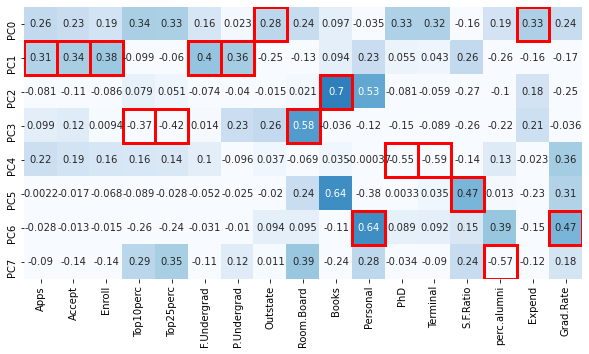

In [54]:
fig,ax = plt.subplots(figsize=(10,5), facecolor='w', edgecolor='k')
ax = sns.heatmap(edu_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = edu_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(edu_pca_loading.columns):
    position = edu_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

## Rounding off the values upto 2 decimal values

In [55]:
round_off_values = np.around(eig_vecs[0]*100, decimals = 2)
print ("\nRounded values : \n", round_off_values)


Rounded values : 
 [-26.22  31.41   8.1   -9.89 -21.99   0.22  -2.83  -9.    13.05 -15.64
  -8.64  18.22 -59.92   8.96   8.94  54.93   0.56]
